In [1]:
import coco_dataset
import pathlib
import show_utils
import common
import numpy as np
from torchvision.transforms import v2
import transforms as mytf

In [2]:
inp_size = 368
coco_dataset = coco_dataset.CocoKeypoints(
    root=str(pathlib.Path("../coco") / "images" / "train2017"),
    annFile=str(pathlib.Path("../coco") / "annotations" / "annotations" / "person_keypoints_train2017.json"),
    transform=None)
i = 0

loading annotations into memory...
Done (t=6.12s)
creating index...
index created!


In [3]:
i = 5

sample: 5
(640, 446)


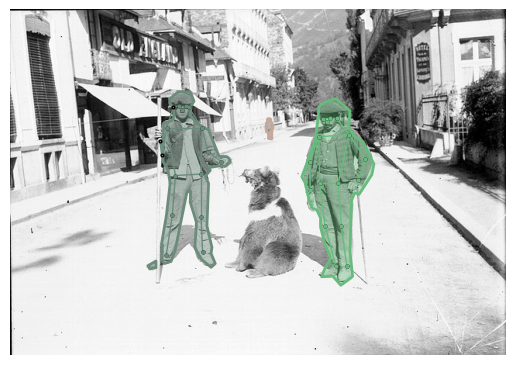

In [4]:
inp, pafs, heatmaps, paf_locs, anns, id = coco_dataset[i]  # ,mask_out

show_utils.show_coco(anns[0], anns[1], coco_dataset.coco, draw_bbox=False)

print(f"sample: {i}")
print(anns[0].size)
i += 1

detected humans: 2


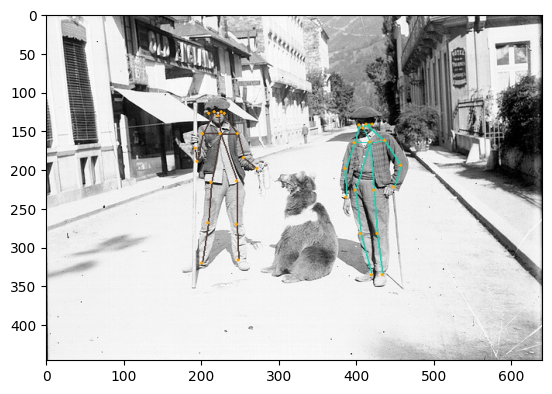

In [5]:
import post
inp = v2.ToPILImage()(inp)
humans = post.post_process(heatmaps, pafs, inp.size)
print("detected humans:", len(humans))

if humans:
    formated = post.format(humans)
    show_utils.draw_skeleton(inp, formated, connectivity=common.connect_skeleton) 
else:
    print("NO DETECTIONS")

In [8]:
heatmaps = heatmaps.numpy()
pafs = pafs.numpy()
paf_locs = np.array(paf_locs, dtype=float)

Heatmaps.size = (19, 55, 80)


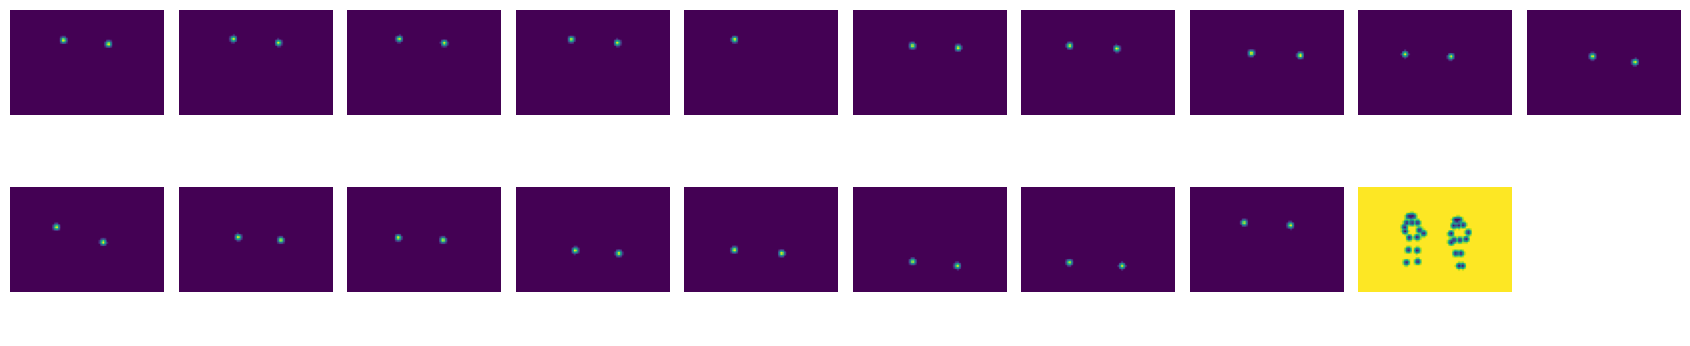

Pafs.size = (38, 55, 80)


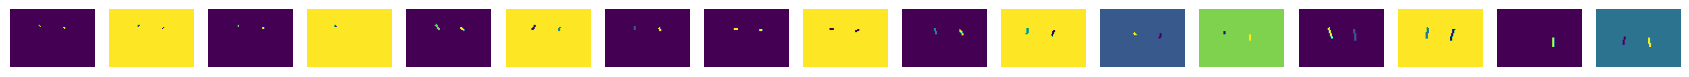

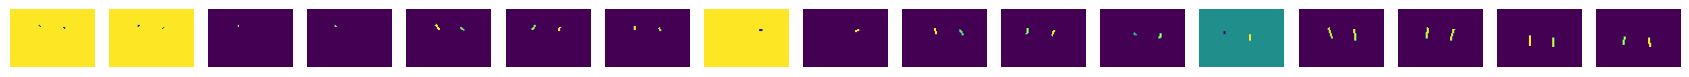

In [9]:
#---------heatmaps---------
print(f"Heatmaps.size = {heatmaps.shape}")
show_utils.plot_grid(heatmaps, 2, 10, (17,4))

#---------pafs---------
print(f"Pafs.size = {pafs.shape}")
show_utils.plot_grid(pafs[[x for x in range(len(pafs)) if x%2==0]], 1, 17, (17, 2))
show_utils.plot_grid(pafs[[x for x in range(len(pafs)) if x%2==1]], 1, 17, (17, 2))

# # ---------blend---------
# show_utils.blend(heatmaps, inp, rows=7, cols=3, figsize=(15, 30))
# show_utils.blend(paf_locs, inp, rows=6, cols=3, figsize=(15, 30))
# # show_utils.blend([mask_out], inp, rows=1, cols=2, figsize=(12, 4))

# # ---------surface---------
# show_utils.surface(heatmaps[0])

# #---------quiver---------
# show_utils.pafs_quiver_combined(pafs, size=(46,46))
# show_utils.pafs_quiver(pafs, size=(46,46))